# Data Fusion project

## Load dataset

In [112]:
import numpy as np
import pandas as pd
import missingno as msno
from matplotlib import pyplot as plt

# Load dataset
dataframe = pd.read_csv('joaq.csv')
dataframe

,entity_id,state,last_updated
0,app_memory,0.022,2023-01-27 00:02:53.470979
1,battery_power,0.0,2023-01-27 00:02:53.473223
2,last_update_trigger,SensorWorker,2023-01-27 00:02:53.477684
3,light_sensor,86,2023-01-27 00:02:53.479552
4,active_notification_count,1,2023-01-27 00:02:53.485171
...,...,...,...
9972,light_sensor,255,2023-01-30 10:54:42.332498
9973,pressure_sensor,1028.7,2023-01-30 10:54:42.334350
9974,app_memory,0.015,2023-01-30 11:01:38.050349
9975,battery_temperature,21.4,2023-01-30 11:01:38.052370


In [113]:
dataframe['last_updated'] = pd.to_datetime(dataframe['last_updated']).dt.round('15min')
dataframe = dataframe.groupby(['last_updated', 'entity_id']).agg({'state': 'max'}).reset_index()
dataframe

,last_updated,entity_id,state
0,2023-01-27 00:00:00,active_notification_count,1
1,2023-01-27 00:00:00,app_memory,0.022
2,2023-01-27 00:00:00,battery_power,0.0
3,2023-01-27 00:00:00,last_update_trigger,SensorWorker
4,2023-01-27 00:00:00,light_sensor,86
...,...,...,...
2970,2023-01-30 11:00:00,battery_temperature,21.5
2971,2023-01-30 11:00:00,bluetooth_connection,1
2972,2023-01-30 11:00:00,last_update_trigger,android.bluetooth.device.action.ACL_CONNECTED
2973,2023-01-30 11:00:00,light_sensor,255


In [114]:
print(dataframe.info())
dataframe.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2975 entries, 0 to 2974
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   last_updated  2975 non-null   datetime64[ns]
 1   entity_id     2975 non-null   object        
 2   state         2975 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 69.9+ KB
None


last_updated    datetime64[ns]
entity_id               object
state                   object
dtype: object

In [115]:
dataframe['entity_id'].value_counts()

app_memory                    221
battery_power                 219
battery_temperature           199
battery_level                 188
pressure_sensor               166
last_update_trigger           165
active_notification_count     164
light_sensor                  133
device_tracker                124
total_rx_gb                   106
doze_mode                     106
screen_brightness             105
app_rx_gb                     105
interactive                   101
proximity_sensor               92
mobile_rx_gb                   91
last_used_app                  90
device_locked                  87
steps_sensor                   77
detected_activity              76
total_tx_gb                    73
mobile_tx_gb                   63
app_tx_gb                      61
wifi_signal_strength           20
wifi_link_speed                20
volume_level_accessibility     17
volume_level_music             17
wifi_frequency                 14
bluetooth_connection            9
wifi_connectio

<AxesSubplot:>

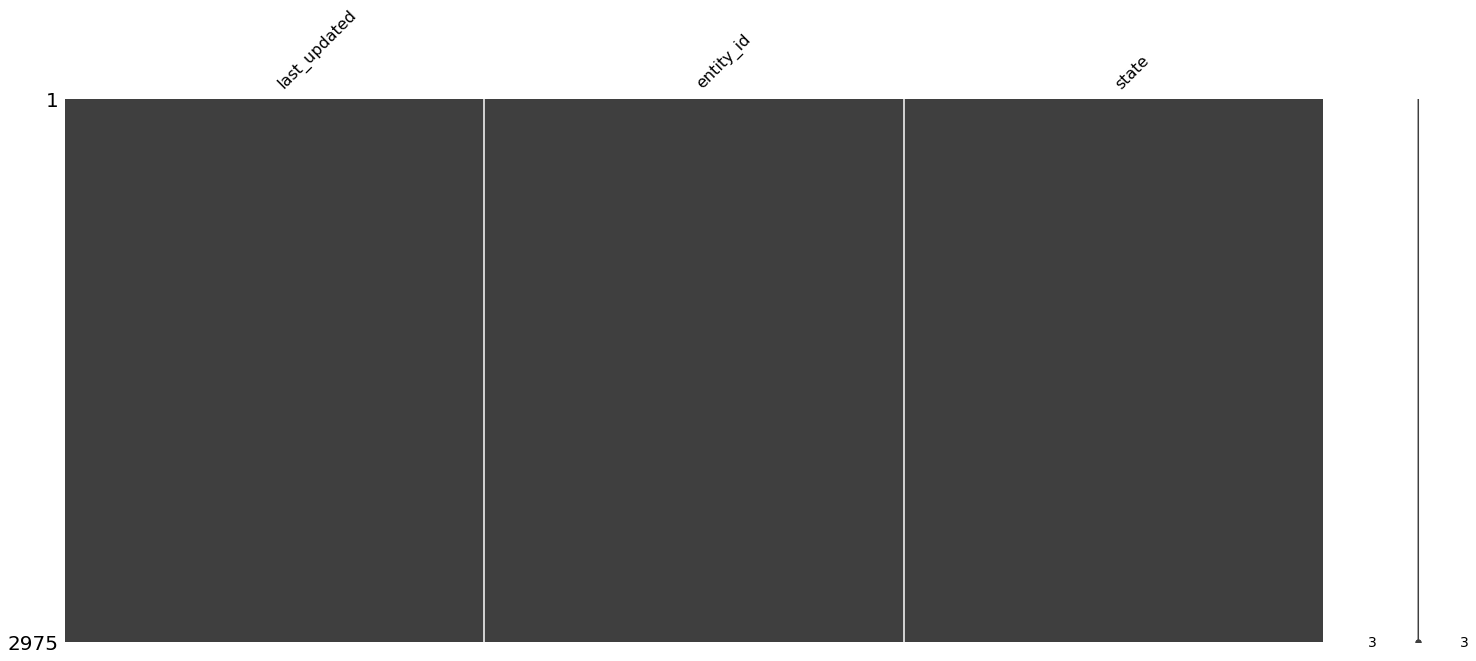

In [116]:
msno.matrix(dataframe)

## Data manipulation

In [117]:
# get all unique sensors
sensor_columns = dataframe['entity_id'].unique()
sensor_columns

array(['active_notification_count', 'app_memory', 'battery_power',
       'last_update_trigger', 'light_sensor', 'pressure_sensor',
       'app_rx_gb', 'app_tx_gb', 'battery_level', 'battery_temperature',
       'detected_activity', 'device_locked', 'device_tracker',
       'doze_mode', 'interactive', 'last_used_app', 'proximity_sensor',
       'screen_brightness', 'steps_sensor', 'total_rx_gb', 'total_tx_gb',
       'wifi_frequency', 'wifi_link_speed', 'wifi_signal_strength',
       'headphones', 'volume_level_accessibility', 'volume_level_call',
       'volume_level_music', 'music_active', 'mobile_rx_gb',
       'mobile_tx_gb', 'network_type', 'wifi_connection', 'audio_mode',
       'phone_state', 'volume_level_system', 'bluetooth_connection',
       'bluetooth_state', 'battery_state', 'charger_type', 'is_charging',
       'battery_health', 'ble_transmitter', 'do_not_disturb_sensor',
       'mobile_data', 'power_save', 'screen_off_timeout', 'speakerphone',
       'wifi_state'], dtype

### Create new dataframe

In [118]:
# create new dataframe with sensors as column headers
df = pd.DataFrame(columns=sensor_columns)
# insert timestamp column as index
df.insert(0, 'timestamp', dataframe['last_updated'].unique())
df = df.set_index('timestamp')
df

,active_notification_count,app_memory,battery_power,last_update_trigger,light_sensor,pressure_sensor,app_rx_gb,app_tx_gb,battery_level,battery_temperature,...,charger_type,is_charging,battery_health,ble_transmitter,do_not_disturb_sensor,mobile_data,power_save,screen_off_timeout,speakerphone,wifi_state
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-01-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-27 00:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-27 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-27 00:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-27 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-30 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-30 10:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-30 10:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [119]:
print(df.info())
df.dtypes

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 222 entries, 2023-01-27 00:00:00 to 2023-01-30 11:00:00
Data columns (total 49 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   active_notification_count   0 non-null      object
 1   app_memory                  0 non-null      object
 2   battery_power               0 non-null      object
 3   last_update_trigger         0 non-null      object
 4   light_sensor                0 non-null      object
 5   pressure_sensor             0 non-null      object
 6   app_rx_gb                   0 non-null      object
 7   app_tx_gb                   0 non-null      object
 8   battery_level               0 non-null      object
 9   battery_temperature         0 non-null      object
 10  detected_activity           0 non-null      object
 11  device_locked               0 non-null      object
 12  device_tracker              0 non-null      object
 13  doze_mode    

active_notification_count     object
app_memory                    object
battery_power                 object
last_update_trigger           object
light_sensor                  object
pressure_sensor               object
app_rx_gb                     object
app_tx_gb                     object
battery_level                 object
battery_temperature           object
detected_activity             object
device_locked                 object
device_tracker                object
doze_mode                     object
interactive                   object
last_used_app                 object
proximity_sensor              object
screen_brightness             object
steps_sensor                  object
total_rx_gb                   object
total_tx_gb                   object
wifi_frequency                object
wifi_link_speed               object
wifi_signal_strength          object
headphones                    object
volume_level_accessibility    object
volume_level_call             object
v

### Fill new dataframe

In [120]:
for i, row in dataframe.iterrows():
    df.at[row['last_updated'], row['entity_id']] = row['state']

df

,active_notification_count,app_memory,battery_power,last_update_trigger,light_sensor,pressure_sensor,app_rx_gb,app_tx_gb,battery_level,battery_temperature,...,charger_type,is_charging,battery_health,ble_transmitter,do_not_disturb_sensor,mobile_data,power_save,screen_off_timeout,speakerphone,wifi_state
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-01-27 00:00:00,1,0.022,0.0,SensorWorker,86,1014.6,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-27 00:15:00,1,0.023,0.0,io.homeassistant.companion.android.UPDATE_SENSORS,6,1014.6,0.0202,0.0097,69,20.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-27 00:30:00,3,0.024,0.0,io.homeassistant.companion.android.UPDATE_SENSORS,62,1014.7,0.0204,NaN,67,30.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-27 00:45:00,1,0.023,0.0,io.homeassistant.companion.android.UPDATE_SENSORS,8,1014.7,0.021,0.0099,62,28.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-27 01:00:00,1,0.021,0.0,android.os.action.DEVICE_IDLE_MODE_CHANGED,NaN,1014.6,NaN,NaN,57,30.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-30 10:00:00,2,0.018,0.0,android.os.action.DEVICE_IDLE_MODE_CHANGED,920,1029.0,0.0546,0.0268,31,27.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-30 10:15:00,2,0.018,0.0,android.os.action.DEVICE_IDLE_MODE_CHANGED,7,1029.2,0.0548,0.0269,25,25.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-30 10:30:00,2,0.017,0.0,android.os.action.DEVICE_IDLE_MODE_CHANGED,246,1028.7,0.055,0.027,23,23.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
print(df.info())
df.dtypes

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 222 entries, 2023-01-27 00:00:00 to 2023-01-30 11:00:00
Data columns (total 49 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   active_notification_count   164 non-null    object
 1   app_memory                  221 non-null    object
 2   battery_power               219 non-null    object
 3   last_update_trigger         165 non-null    object
 4   light_sensor                133 non-null    object
 5   pressure_sensor             166 non-null    object
 6   app_rx_gb                   105 non-null    object
 7   app_tx_gb                   61 non-null     object
 8   battery_level               188 non-null    object
 9   battery_temperature         199 non-null    object
 10  detected_activity           76 non-null     object
 11  device_locked               87 non-null     object
 12  device_tracker              124 non-null    object
 13  doze_mode    

active_notification_count     object
app_memory                    object
battery_power                 object
last_update_trigger           object
light_sensor                  object
pressure_sensor               object
app_rx_gb                     object
app_tx_gb                     object
battery_level                 object
battery_temperature           object
detected_activity             object
device_locked                 object
device_tracker                object
doze_mode                     object
interactive                   object
last_used_app                 object
proximity_sensor              object
screen_brightness             object
steps_sensor                  object
total_rx_gb                   object
total_tx_gb                   object
wifi_frequency                object
wifi_link_speed               object
wifi_signal_strength          object
headphones                    object
volume_level_accessibility    object
volume_level_call             object
v

In [122]:
# check missing values in variables
df.isnull().sum()

active_notification_count      58
app_memory                      1
battery_power                   3
last_update_trigger            57
light_sensor                   89
pressure_sensor                56
app_rx_gb                     117
app_tx_gb                     161
battery_level                  34
battery_temperature            23
detected_activity             146
device_locked                 135
device_tracker                 98
doze_mode                     116
interactive                   121
last_used_app                 132
proximity_sensor              130
screen_brightness             117
steps_sensor                  145
total_rx_gb                   116
total_tx_gb                   149
wifi_frequency                208
wifi_link_speed               202
wifi_signal_strength          202
headphones                    218
volume_level_accessibility    205
volume_level_call             216
volume_level_music            205
music_active                  216
mobile_rx_gb  

In [123]:
unparsed_column = []
for column in df:
    try:
        df[f'{column}'] = df[f'{column}'].astype(np.float64)
    except Exception as e:
        unparsed_column.append(column)
        print(column)

print(f'# of failed parses: {len(unparsed_column)}')

last_update_trigger
detected_activity
device_locked
device_tracker
doze_mode
interactive
last_used_app
headphones
music_active
network_type
wifi_connection
audio_mode
phone_state
bluetooth_state
battery_state
charger_type
is_charging
battery_health
ble_transmitter
do_not_disturb_sensor
mobile_data
power_save
screen_off_timeout
speakerphone
wifi_state
# of failed parses: 25


In [124]:
df

,active_notification_count,app_memory,battery_power,last_update_trigger,light_sensor,pressure_sensor,app_rx_gb,app_tx_gb,battery_level,battery_temperature,...,charger_type,is_charging,battery_health,ble_transmitter,do_not_disturb_sensor,mobile_data,power_save,screen_off_timeout,speakerphone,wifi_state
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-01-27 00:00:00,1.0,0.022,0.0,SensorWorker,86.0,1014.6,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-27 00:15:00,1.0,0.023,0.0,io.homeassistant.companion.android.UPDATE_SENSORS,6.0,1014.6,0.0202,0.0097,69.0,20.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-27 00:30:00,3.0,0.024,0.0,io.homeassistant.companion.android.UPDATE_SENSORS,62.0,1014.7,0.0204,NaN,67.0,30.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-27 00:45:00,1.0,0.023,0.0,io.homeassistant.companion.android.UPDATE_SENSORS,8.0,1014.7,0.0210,0.0099,62.0,28.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-27 01:00:00,1.0,0.021,0.0,android.os.action.DEVICE_IDLE_MODE_CHANGED,NaN,1014.6,NaN,NaN,57.0,30.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-30 10:00:00,2.0,0.018,0.0,android.os.action.DEVICE_IDLE_MODE_CHANGED,920.0,1029.0,0.0546,0.0268,31.0,27.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-30 10:15:00,2.0,0.018,0.0,android.os.action.DEVICE_IDLE_MODE_CHANGED,7.0,1029.2,0.0548,0.0269,25.0,25.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-30 10:30:00,2.0,0.017,0.0,android.os.action.DEVICE_IDLE_MODE_CHANGED,246.0,1028.7,0.0550,0.0270,23.0,23.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
print(df.info())
df.dtypes

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 222 entries, 2023-01-27 00:00:00 to 2023-01-30 11:00:00
Data columns (total 49 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   active_notification_count   164 non-null    float64
 1   app_memory                  221 non-null    float64
 2   battery_power               219 non-null    float64
 3   last_update_trigger         165 non-null    object 
 4   light_sensor                133 non-null    float64
 5   pressure_sensor             166 non-null    float64
 6   app_rx_gb                   105 non-null    float64
 7   app_tx_gb                   61 non-null     float64
 8   battery_level               188 non-null    float64
 9   battery_temperature         199 non-null    float64
 10  detected_activity           76 non-null     object 
 11  device_locked               87 non-null     object 
 12  device_tracker              124 non-null    object 
 13

active_notification_count     float64
app_memory                    float64
battery_power                 float64
last_update_trigger            object
light_sensor                  float64
pressure_sensor               float64
app_rx_gb                     float64
app_tx_gb                     float64
battery_level                 float64
battery_temperature           float64
detected_activity              object
device_locked                  object
device_tracker                 object
doze_mode                      object
interactive                    object
last_used_app                  object
proximity_sensor              float64
screen_brightness             float64
steps_sensor                  float64
total_rx_gb                   float64
total_tx_gb                   float64
wifi_frequency                float64
wifi_link_speed               float64
wifi_signal_strength          float64
headphones                     object
volume_level_accessibility    float64
volume_level

<AxesSubplot:>

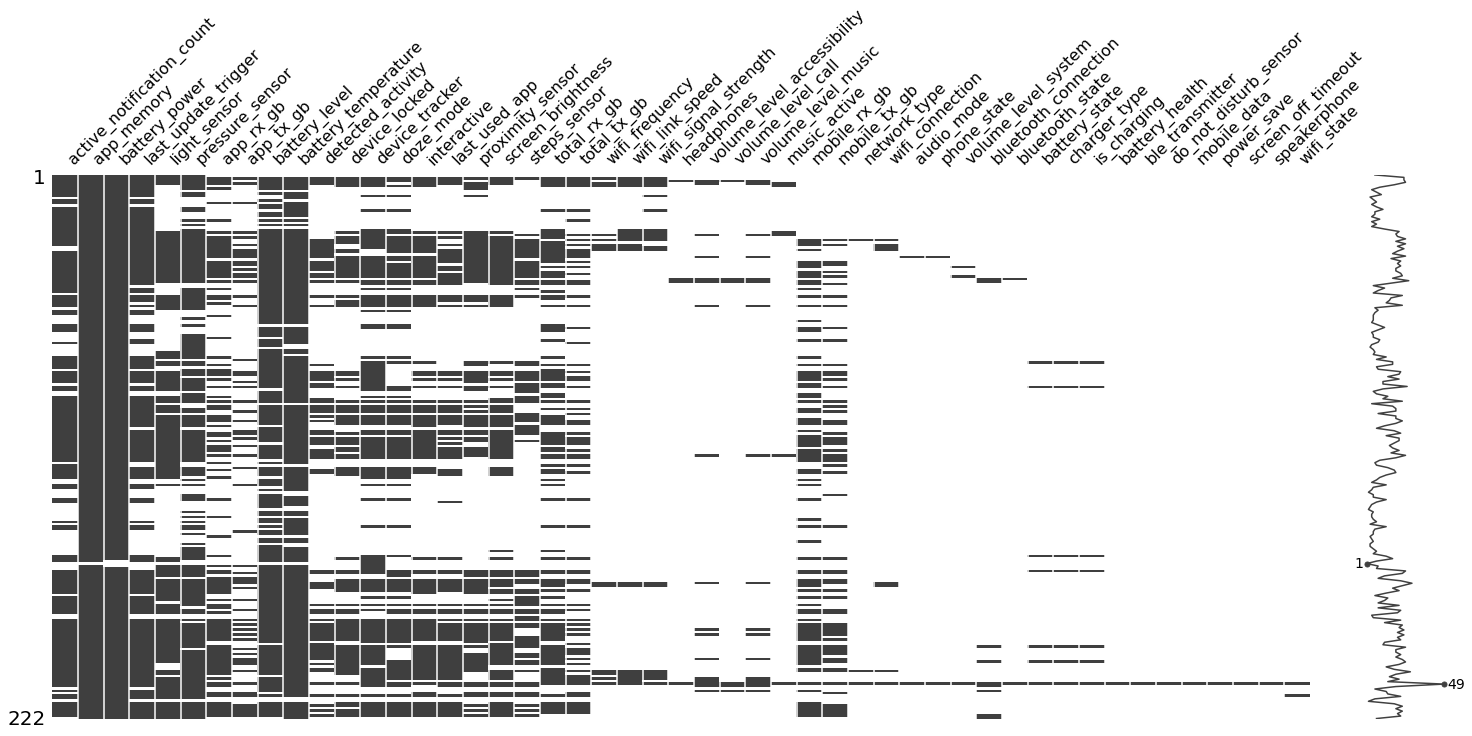

In [126]:
msno.matrix(df)

In [127]:
df.describe()

,active_notification_count,app_memory,battery_power,light_sensor,pressure_sensor,app_rx_gb,app_tx_gb,battery_level,battery_temperature,proximity_sensor,...,wifi_frequency,wifi_link_speed,wifi_signal_strength,volume_level_accessibility,volume_level_call,volume_level_music,mobile_rx_gb,mobile_tx_gb,volume_level_system,bluetooth_connection
count,164.000000,221.000000,219.000000,133.000000,166.000000,105.000000,61.000000,188.000000,199.000000,92.000000,...,14.000000,20.000000,20.000000,17.000000,6.00,17.000000,91.000000,63.000000,3.000000,9.000000
mean,1.439024,0.020213,0.000274,348.030075,998.345783,0.040721,0.020185,47.462766,26.162312,6.869565,...,4103.714286,202.000000,-64.200000,7.235294,4.00,6.411765,0.547725,0.062429,2.333333,0.888889
std,0.966907,0.003961,0.001636,1145.640637,20.639992,0.008745,0.004362,26.571339,4.478528,2.801951,...,2369.562616,262.434353,16.567565,3.767118,2.00,4.062924,0.223658,0.025630,4.041452,0.600925
min,0.000000,0.011000,0.000000,0.000000,915.500000,0.020200,0.009700,3.000000,10.600000,0.000000,...,0.000000,0.000000,-83.000000,1.000000,0.00,0.000000,0.001000,0.000000,0.000000,0.000000
25%,1.000000,0.018000,0.000000,7.000000,983.000000,0.038300,0.019100,24.750000,22.850000,8.000000,...,3184.000000,78.000000,-71.000000,6.000000,4.25,5.000000,0.363500,0.040500,0.000000,1.000000
50%,1.000000,0.021000,0.000000,51.000000,996.550000,0.041700,0.020800,44.500000,25.500000,8.000000,...,5500.000000,86.000000,-67.500000,7.000000,5.00,6.000000,0.550000,0.062000,0.000000,1.000000
75%,2.000000,0.023000,0.000000,226.000000,1014.700000,0.046000,0.022500,66.000000,29.600000,8.000000,...,5500.000000,158.250000,-64.750000,8.000000,5.00,7.000000,0.712500,0.086500,3.500000,1.000000
max,5.000000,0.036000,0.010000,8972.000000,1029.200000,0.055200,0.027100,100.000000,37.700000,8.000000,...,5540.000000,866.000000,-1.000000,15.000000,5.00,15.000000,0.949000,0.103000,7.000000,2.000000


<AxesSubplot:>

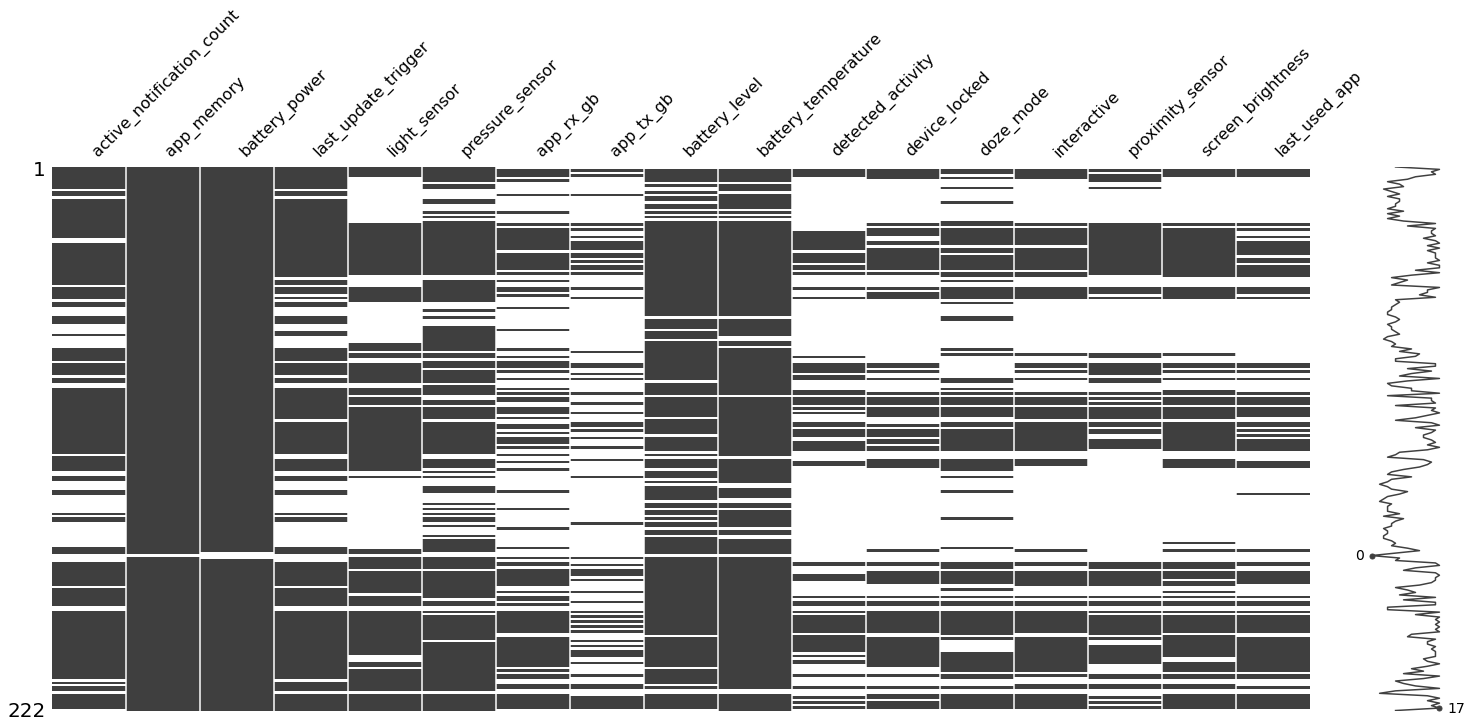

In [128]:
df = df[[
    'active_notification_count',
    'app_memory',
    'battery_power',
    'last_update_trigger',
    'light_sensor',
    'pressure_sensor',
    'app_rx_gb',
    'app_tx_gb',
    'battery_level',
    'battery_temperature',
    'detected_activity',
    'device_locked',
    'doze_mode',
    'interactive',
    'proximity_sensor',
    'screen_brightness',
    'last_used_app'
]]

msno.matrix(df)

C:\Users\lemos\AppData\Local\Temp\ipykernel_13800\1583434776.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['active_notification_count'] = df['active_notification_count'].fillna(0)
C:\Users\lemos\AppData\Local\Temp\ipykernel_13800\1583434776.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['app_memory'] = df['app_memory'].fillna(0)
C:\Users\lemos\AppData\Local\Temp\ipykernel_13800\1583434776.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

<AxesSubplot:>

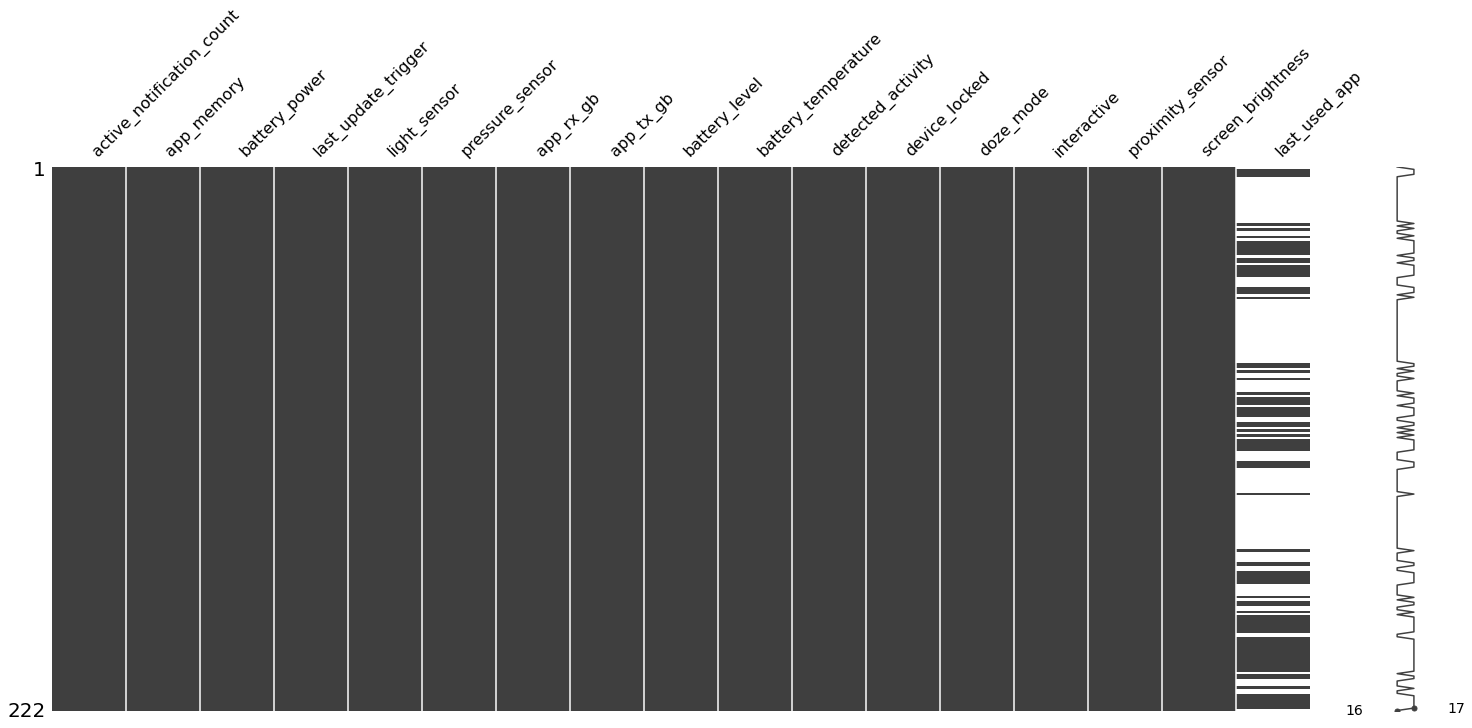

In [129]:
df['active_notification_count'] = df['active_notification_count'].fillna(0)
df['app_memory'] = df['app_memory'].fillna(0)
df['battery_power'] = df['battery_power'].fillna(-9999)
df['last_update_trigger'] = df['last_update_trigger'].fillna('SensorWorker')
df['light_sensor'] = df['light_sensor'].fillna(-9999)
df['pressure_sensor'] = df['pressure_sensor'].fillna(1)
df['app_rx_gb'] = df['app_rx_gb'].fillna(0)
df['app_tx_gb'] = df['app_tx_gb'].fillna(0)
df['battery_level'] = df['battery_power'].fillna(-9999)
df['battery_temperature'] = df['battery_temperature'].fillna(-9999)
df['detected_activity'] = df['detected_activity'].fillna('unknown')
df['device_locked'] = df['device_locked'].fillna('off')
df['doze_mode'] = df['doze_mode'].fillna('off')
df['interactive'] = df['interactive'].fillna('off')
df['proximity_sensor'] = df['proximity_sensor'].fillna(0)
df['screen_brightness'] = df['screen_brightness'].fillna(0)

msno.matrix(df)

In [130]:
df['last_used_app']

timestamp
2023-01-27 00:00:00                                   NaN
2023-01-27 00:15:00    io.homeassistant.companion.android
2023-01-27 00:30:00                          com.whatsapp
2023-01-27 00:45:00    io.homeassistant.companion.android
2023-01-27 01:00:00                                   NaN
                                      ...                
2023-01-30 10:00:00                 com.instagram.android
2023-01-30 10:15:00                   com.revolut.revolut
2023-01-30 10:30:00                com.microsoft.launcher
2023-01-30 10:45:00             kr.co.vcnc.android.couple
2023-01-30 11:00:00                                   NaN
Name: last_used_app, Length: 222, dtype: object

In [131]:
app_name = 'io.homeassistant.companion.android'

for i, row in enumerate(df['last_used_app']):
    if not pd.isnull(df['last_used_app'].iloc[i]):
        app_name = row
    else:
        df['last_used_app'].iloc[i] = app_name

df['last_used_app']

C:\Users\lemos\AppData\Local\Temp\ipykernel_13800\2080299758.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['last_used_app'].iloc[i] = app_name


timestamp
2023-01-27 00:00:00    io.homeassistant.companion.android
2023-01-27 00:15:00    io.homeassistant.companion.android
2023-01-27 00:30:00                          com.whatsapp
2023-01-27 00:45:00    io.homeassistant.companion.android
2023-01-27 01:00:00    io.homeassistant.companion.android
                                      ...                
2023-01-30 10:00:00                 com.instagram.android
2023-01-30 10:15:00                   com.revolut.revolut
2023-01-30 10:30:00                com.microsoft.launcher
2023-01-30 10:45:00             kr.co.vcnc.android.couple
2023-01-30 11:00:00             kr.co.vcnc.android.couple
Name: last_used_app, Length: 222, dtype: object

<AxesSubplot:>

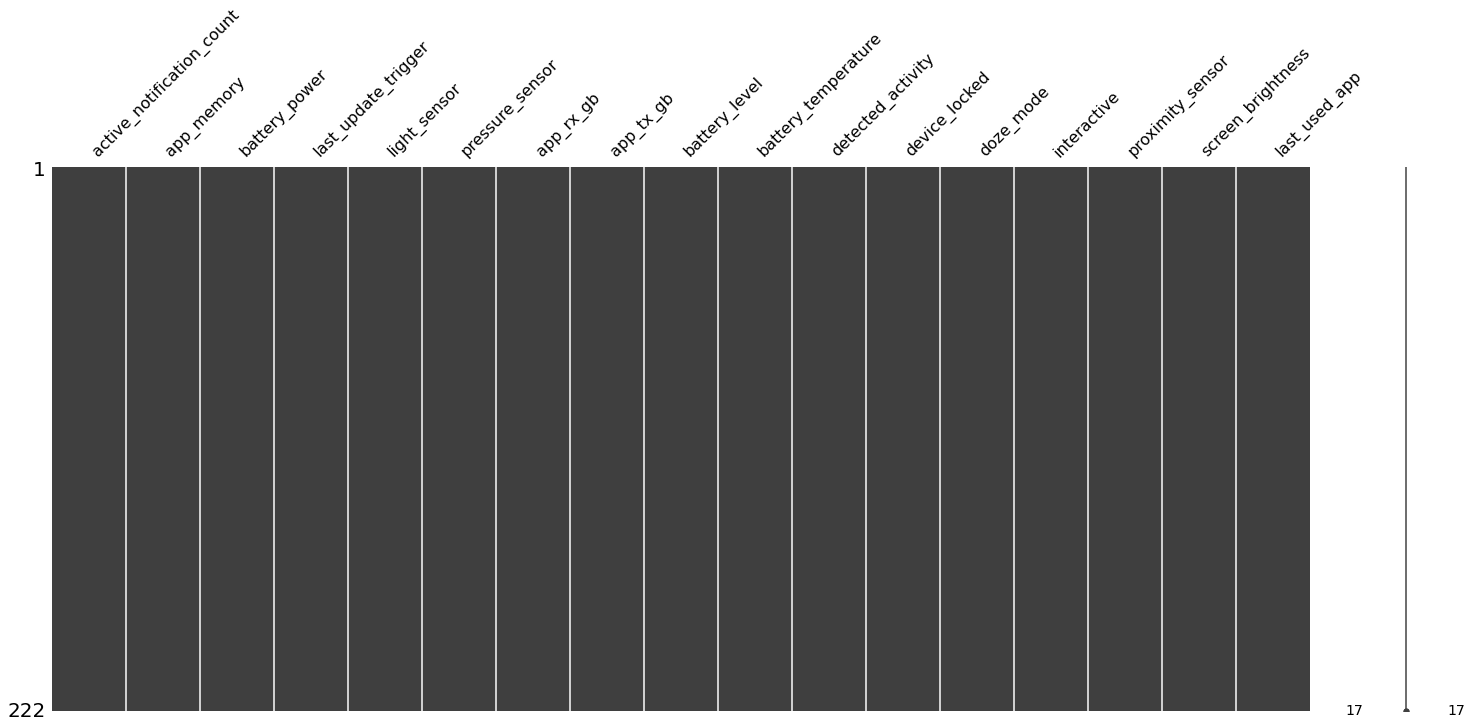

In [132]:
msno.matrix(df)

In [133]:
print(df.info())
df.dtypes

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 222 entries, 2023-01-27 00:00:00 to 2023-01-30 11:00:00
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   active_notification_count  222 non-null    float64
 1   app_memory                 222 non-null    float64
 2   battery_power              222 non-null    float64
 3   last_update_trigger        222 non-null    object 
 4   light_sensor               222 non-null    float64
 5   pressure_sensor            222 non-null    float64
 6   app_rx_gb                  222 non-null    float64
 7   app_tx_gb                  222 non-null    float64
 8   battery_level              222 non-null    float64
 9   battery_temperature        222 non-null    float64
 10  detected_activity          222 non-null    object 
 11  device_locked              222 non-null    object 
 12  doze_mode                  222 non-null    object 
 13  interactive  

active_notification_count    float64
app_memory                   float64
battery_power                float64
last_update_trigger           object
light_sensor                 float64
pressure_sensor              float64
app_rx_gb                    float64
app_tx_gb                    float64
battery_level                float64
battery_temperature          float64
detected_activity             object
device_locked                 object
doze_mode                     object
interactive                   object
proximity_sensor             float64
screen_brightness            float64
last_used_app                 object
dtype: object

In [134]:
import category_encoders as ce

# encode variables with ordinal encoding
encoder = ce.OrdinalEncoder(
    cols=[
        'last_update_trigger',
        'detected_activity',
        'device_locked',
        'doze_mode',
        'interactive'
])

df = encoder.fit_transform(df)
df

,active_notification_count,app_memory,battery_power,last_update_trigger,light_sensor,pressure_sensor,app_rx_gb,app_tx_gb,battery_level,battery_temperature,detected_activity,device_locked,doze_mode,interactive,proximity_sensor,screen_brightness,last_used_app
timestamp,,,,,,,,,,,,,,,,,
2023-01-27 00:00:00,1.0,0.022,0.0,1,86.0,1014.6,0.0000,0.0000,0.0,-9999.0,1,1,1,1,0.0,0.0,io.homeassistant.companion.android
2023-01-27 00:15:00,1.0,0.023,0.0,2,6.0,1014.6,0.0202,0.0097,0.0,20.1,1,2,2,2,8.0,94.0,io.homeassistant.companion.android
2023-01-27 00:30:00,3.0,0.024,0.0,2,62.0,1014.7,0.0204,0.0000,0.0,30.8,1,1,1,2,0.0,99.0,com.whatsapp
2023-01-27 00:45:00,1.0,0.023,0.0,2,8.0,1014.7,0.0210,0.0099,0.0,28.9,1,2,1,2,8.0,84.0,io.homeassistant.companion.android
2023-01-27 01:00:00,1.0,0.021,0.0,3,-9999.0,1014.6,0.0000,0.0000,0.0,30.6,1,2,2,1,8.0,0.0,io.homeassistant.companion.android
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-30 10:00:00,2.0,0.018,0.0,3,920.0,1029.0,0.0546,0.0268,0.0,27.3,1,1,2,2,0.0,122.0,com.instagram.android
2023-01-30 10:15:00,2.0,0.018,0.0,3,7.0,1029.2,0.0548,0.0269,0.0,25.8,1,2,2,2,8.0,255.0,com.revolut.revolut
2023-01-30 10:30:00,2.0,0.017,0.0,3,246.0,1028.7,0.0550,0.0270,0.0,23.6,1,2,2,2,0.0,112.0,com.microsoft.launcher


In [135]:
# Check labels
df['last_used_app'].value_counts()

com.microsoft.launcher                37
com.instagram.android                 36
io.homeassistant.companion.android    28
com.sec.location.nsflp2               23
com.whatsapp                          17
com.sec.android.app.camera            12
net.pluservice.Arriva                  8
com.wanderlog.android                  7
kr.co.vcnc.android.couple              6
com.spotify.music                      5
com.mttnow.droid.easyjet               5
com.revolut.revolut                    5
com.sec.android.app.myfiles            5
com.sec.android.gallery3d              4
com.sec.android.app.launcher           3
com.google.android.keep                3
com.facebook.orca                      2
com.microsoft.office.outlook           2
world.skratch.app                      2
net.skyscanner.android.main            2
com.avuscapital.trading212             2
com.realbyteapps.moneya                2
com.sec.android.app.clockpackage       2
com.samsung.android.incallui           1
com.skype.raider

<AxesSubplot:>

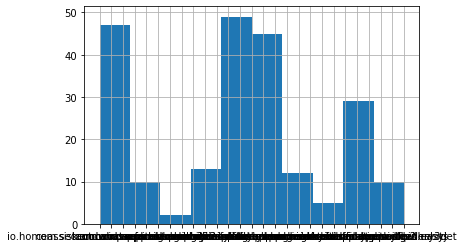

In [136]:
df['last_used_app'].hist()

In [137]:
# get features
X = df.drop(['last_used_app'], axis=1)
X

,active_notification_count,app_memory,battery_power,last_update_trigger,light_sensor,pressure_sensor,app_rx_gb,app_tx_gb,battery_level,battery_temperature,detected_activity,device_locked,doze_mode,interactive,proximity_sensor,screen_brightness
timestamp,,,,,,,,,,,,,,,,
2023-01-27 00:00:00,1.0,0.022,0.0,1,86.0,1014.6,0.0000,0.0000,0.0,-9999.0,1,1,1,1,0.0,0.0
2023-01-27 00:15:00,1.0,0.023,0.0,2,6.0,1014.6,0.0202,0.0097,0.0,20.1,1,2,2,2,8.0,94.0
2023-01-27 00:30:00,3.0,0.024,0.0,2,62.0,1014.7,0.0204,0.0000,0.0,30.8,1,1,1,2,0.0,99.0
2023-01-27 00:45:00,1.0,0.023,0.0,2,8.0,1014.7,0.0210,0.0099,0.0,28.9,1,2,1,2,8.0,84.0
2023-01-27 01:00:00,1.0,0.021,0.0,3,-9999.0,1014.6,0.0000,0.0000,0.0,30.6,1,2,2,1,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-30 10:00:00,2.0,0.018,0.0,3,920.0,1029.0,0.0546,0.0268,0.0,27.3,1,1,2,2,0.0,122.0
2023-01-30 10:15:00,2.0,0.018,0.0,3,7.0,1029.2,0.0548,0.0269,0.0,25.8,1,2,2,2,8.0,255.0
2023-01-30 10:30:00,2.0,0.017,0.0,3,246.0,1028.7,0.0550,0.0270,0.0,23.6,1,2,2,2,0.0,112.0


In [138]:
# get labels
y = df['last_used_app']
y

timestamp
2023-01-27 00:00:00    io.homeassistant.companion.android
2023-01-27 00:15:00    io.homeassistant.companion.android
2023-01-27 00:30:00                          com.whatsapp
2023-01-27 00:45:00    io.homeassistant.companion.android
2023-01-27 01:00:00    io.homeassistant.companion.android
                                      ...                
2023-01-30 10:00:00                 com.instagram.android
2023-01-30 10:15:00                   com.revolut.revolut
2023-01-30 10:30:00                com.microsoft.launcher
2023-01-30 10:45:00             kr.co.vcnc.android.couple
2023-01-30 11:00:00             kr.co.vcnc.android.couple
Name: last_used_app, Length: 222, dtype: object

In [139]:
from sklearn.model_selection import train_test_split

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)#, stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(155, 16) (67, 16) (155,) (67,)


## Decision Tree

In [144]:
from sklearn.tree import DecisionTreeClassifier

# build decision tree classifier
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=0)
# train decision tree
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [146]:
from sklearn.metrics import classification_report

# make prediction
y_pred_clf_gini = clf_gini.predict(X_test)
print(classification_report(y_test, y_pred_clf_gini))
print(f'Train accuracy:\t {clf_gini.score(X_train, y_train)}')
print(f'Test accuracy:\t {clf_gini.score(X_test, y_test)}')

                                    precision    recall  f1-score   support

        com.avuscapital.trading212       0.00      0.00      0.00         1
                 com.facebook.orca       0.00      0.00      0.00         2
           com.google.android.keep       0.00      0.00      0.00         1
             com.instagram.android       0.38      0.42      0.40        12
            com.microsoft.launcher       0.36      0.40      0.38        10
      com.microsoft.office.outlook       0.00      0.00      0.00         1
          com.mttnow.droid.easyjet       0.00      0.00      0.00         1
           com.realbyteapps.moneya       0.00      0.00      0.00         1
               com.revolut.revolut       0.00      0.00      0.00         2
        com.samsung.android.dialer       0.00      0.00      0.00         0
        com.sec.android.app.camera       0.17      0.25      0.20         4
  com.sec.android.app.clockpackage       0.00      0.00      0.00         1
      com.s

C:\Users\lemos\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lemos\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lemos\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lemos\anaconda3\lib\site-packages\sklearn\metrics\_cla

## KNeighbors

In [147]:
from sklearn.neighbors import KNeighborsClassifier

# build KNeighbors classifier
neigh = KNeighborsClassifier(n_neighbors=5)
# train KNeighbors
neigh.fit(X_train, y_train)

KNeighborsClassifier()

In [148]:
# make prediction
y_pred_neigh = neigh.predict(X_test)
print(classification_report(y_test, y_pred_neigh))
print(f'Train accuracy:\t {neigh.score(X_train, y_train)}')
print(f'Test accuracy:\t {neigh.score(X_test, y_test)}')

                                    precision    recall  f1-score   support

        com.avuscapital.trading212       0.00      0.00      0.00         1
                 com.facebook.orca       0.00      0.00      0.00         2
           com.google.android.keep       0.00      0.00      0.00         1
             com.instagram.android       0.29      0.67      0.40        12
            com.microsoft.launcher       0.12      0.10      0.11        10
      com.microsoft.office.outlook       0.00      0.00      0.00         1
          com.mttnow.droid.easyjet       0.00      0.00      0.00         1
           com.realbyteapps.moneya       0.00      0.00      0.00         1
               com.revolut.revolut       0.00      0.00      0.00         2
        com.sec.android.app.camera       0.00      0.00      0.00         4
  com.sec.android.app.clockpackage       0.00      0.00      0.00         1
      com.sec.android.app.launcher       0.00      0.00      0.00         1
       com.

C:\Users\lemos\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lemos\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lemos\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## MLP

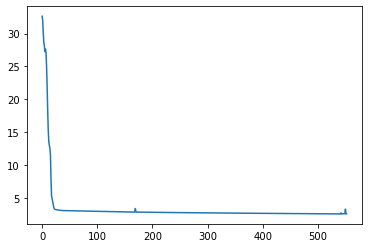

In [149]:
from sklearn.neural_network import MLPClassifier

# build MLP classifier
clf = MLPClassifier(hidden_layer_sizes=(200, 40, 10), activation='relu', solver='adam', max_iter=1000)
# train model
model = clf.fit(X_train, y_train)
plt.plot(clf.loss_curve_)

In [150]:
# make prediction
y_pred_mlp = model.predict(X_test)
print(classification_report(y_test, y_pred_mlp))
print(f'Train accuracy:\t {model.score(X_train, y_train)}')
print(f'Test accuracy:\t {model.score(X_test, y_test)}')

                                    precision    recall  f1-score   support

        com.avuscapital.trading212       0.00      0.00      0.00         1
                 com.facebook.orca       0.00      0.00      0.00         2
           com.google.android.keep       0.00      0.00      0.00         1
             com.instagram.android       0.00      0.00      0.00        12
            com.microsoft.launcher       0.15      0.90      0.25        10
      com.microsoft.office.outlook       0.00      0.00      0.00         1
          com.mttnow.droid.easyjet       0.00      0.00      0.00         1
           com.realbyteapps.moneya       0.00      0.00      0.00         1
               com.revolut.revolut       0.00      0.00      0.00         2
        com.sec.android.app.camera       0.00      0.00      0.00         4
  com.sec.android.app.clockpackage       0.00      0.00      0.00         1
      com.sec.android.app.launcher       0.00      0.00      0.00         1
       com.

C:\Users\lemos\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lemos\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lemos\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\lemos\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


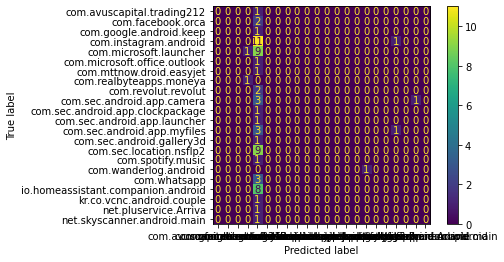

In [151]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test)